In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("heart-disease (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = df.drop("target", axis=1)
y = df["target"]

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
sbc = StandardScaler()
x_Scaled = sbc.fit_transform(x)

In [6]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((61, 13), (242, 13), (61,), (242,))

In [12]:
k = ['linear', 'poly', 'rbf', 'sigmoid']
d = {}
for i in k:
    model = SVC(kernel = i)
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    d[i] = acc
    print(f"Kernel = {i} --> Accuracy = {acc:.4f}")

d

Kernel = linear --> Accuracy = 0.7769
Kernel = poly --> Accuracy = 0.6405
Kernel = rbf --> Accuracy = 0.5496
Kernel = sigmoid --> Accuracy = 0.5413


{'linear': 0.7768595041322314,
 'poly': 0.640495867768595,
 'rbf': 0.5495867768595041,
 'sigmoid': 0.5413223140495868}

Text(0, 0.5, 'accuracy Scores')

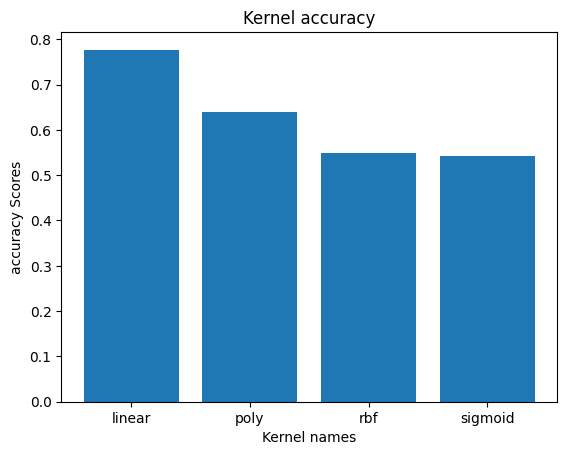

In [14]:
plt.bar(d.keys(), d.values())
plt.title("Kernel accuracy")
plt.xlabel("Kernel names")
plt.ylabel("accuracy Scores")
